In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ccc = pd.read_excel('../../datasets/credit_card_clients.xls', skiprows=[0])

In [3]:
ccc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [58]:
ccc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          30000 non-null  int64   
 1   LIMIT_BAL   30000 non-null  int64   
 2   SEX         30000 non-null  int64   
 3   EDUCATION   30000 non-null  int64   
 4   MARRIAGE    30000 non-null  int64   
 5   AGE         30000 non-null  int64   
 6   PAY_0       30000 non-null  int64   
 7   PAY_2       30000 non-null  int64   
 8   PAY_3       30000 non-null  int64   
 9   PAY_4       30000 non-null  int64   
 10  PAY_5       30000 non-null  int64   
 11  PAY_6       30000 non-null  int64   
 12  BILL_AMT1   30000 non-null  int64   
 13  BILL_AMT2   30000 non-null  int64   
 14  BILL_AMT3   30000 non-null  int64   
 15  BILL_AMT4   30000 non-null  int64   
 16  BILL_AMT5   30000 non-null  int64   
 17  BILL_AMT6   30000 non-null  int64   
 18  PAY_AMT1    30000 non-null  int64   
 19  PAY_

In [5]:
# description of the colums https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
ccc.columns


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
# rename target column
ccc.rename(columns = {'default payment next month': 'Y'}, inplace=True)
ccc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y'],
      dtype='object')

In [15]:
ccc.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
ccc.value_counts('Y')

Y
0    23364
1     6636
dtype: int64

In [11]:
ccc.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
Y                2
dtype: int64

<AxesSubplot:>

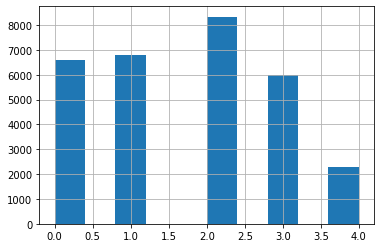

In [70]:
# define bins
ccc["age_bins"] = pd.cut(ccc["AGE"],
                        bins=[0, 27, 32, 40, 50, np.inf],
                        labels=[1, 2, 3, 4, 5])
# convert to numerical
ccc["age_bins"] = ccc["age_bins"].cat.codes

ccc["age_bins"].hist()
                        

<AxesSubplot:>

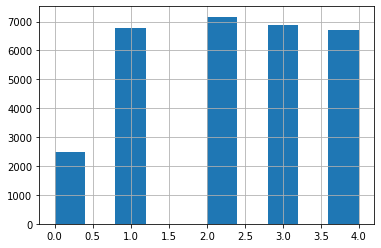

In [71]:
ccc["limit_bins"] = pd.cut(ccc["LIMIT_BAL"],
                        bins=[0, 25000, 75000, 150000, 250000, np.inf],
                        labels=[1, 2, 3, 4, 5])

ccc["limit_bins"] = ccc["limit_bins"].cat.codes

ccc["limit_bins"].hist()

In [72]:
ccc["limit_bins"].value_counts()

2    7168
3    6883
1    6761
4    6717
0    2471
Name: limit_bins, dtype: int64

In [73]:
ccc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,age_bins,limit_bins
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,2
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,2,2
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,2,1
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,4,1


In [75]:
corr_matrix = ccc.corr()
corr_matrix["Y"].sort_values(ascending=False)

Y             1.000000
PAY_0         0.324794
PAY_2         0.263551
PAY_3         0.235253
PAY_4         0.216614
PAY_5         0.204149
PAY_6         0.186866
EDUCATION     0.028006
AGE           0.013890
age_bins      0.007850
BILL_AMT6    -0.005372
BILL_AMT5    -0.006760
BILL_AMT4    -0.010156
ID           -0.013952
BILL_AMT3    -0.014076
BILL_AMT2    -0.014193
BILL_AMT1    -0.019644
MARRIAGE     -0.024339
SEX          -0.039961
PAY_AMT6     -0.053183
PAY_AMT5     -0.055124
PAY_AMT3     -0.056250
PAY_AMT4     -0.056827
PAY_AMT2     -0.058579
PAY_AMT1     -0.072929
LIMIT_BAL    -0.153520
limit_bins   -0.166444
Name: Y, dtype: float64

In [14]:
ccc.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X = ccc.iloc[:, :-1]
y = ccc.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=31, stratify=y)

In [37]:
y.value_counts() / len(y)

0    0.7788
1    0.2212
Name: Y, dtype: float64

In [38]:
y_train.value_counts() / len(y_train)

0    0.778792
1    0.221208
Name: Y, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

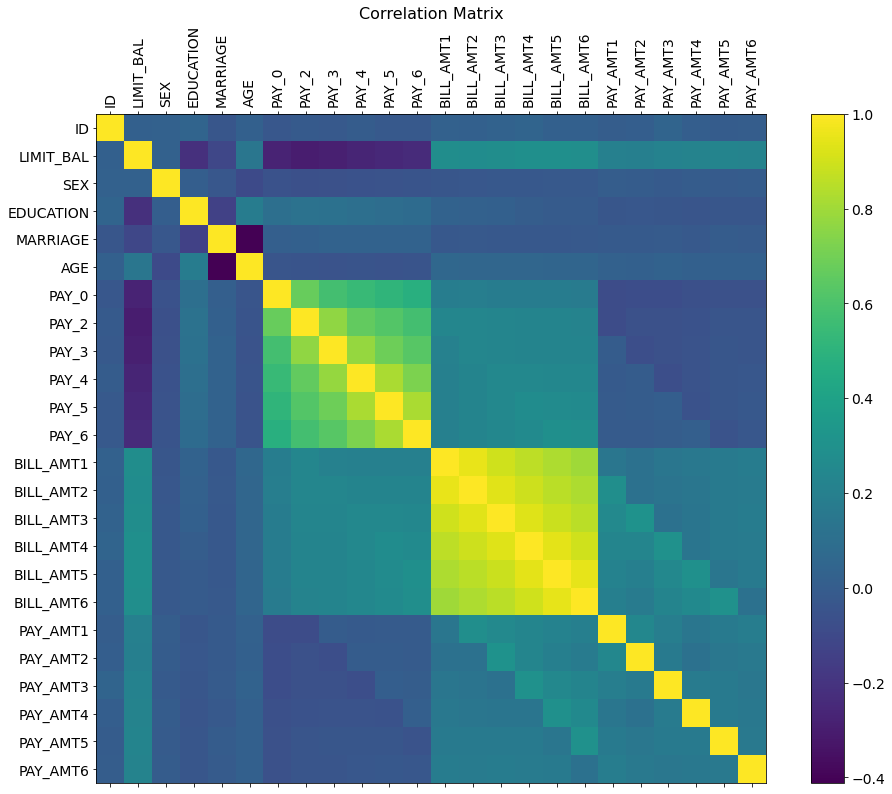

In [39]:
f = plt.figure(figsize=(16, 12))
plt.matshow(X_train.corr(), fignum=f.number)
plt.xticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [40]:
corr_matrix = ccc.corr()
corr_matrix["Y"].sort_values(ascending=False)

Y            1.000000
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
EDUCATION    0.028006
AGE          0.013890
BILL_AMT6   -0.005372
BILL_AMT5   -0.006760
BILL_AMT4   -0.010156
ID          -0.013952
BILL_AMT3   -0.014076
BILL_AMT2   -0.014193
BILL_AMT1   -0.019644
MARRIAGE    -0.024339
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: Y, dtype: float64

In [21]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

marr_1hot = cat_encoder.fit_transform(ccc[["MARRIAGE"]])
marr_1hot

<30000x4 sparse matrix of type '<class 'numpy.float64'>'
	with 30000 stored elements in Compressed Sparse Row format>

In [27]:
print(marr_1hot[:20])

  (0, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 1)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 3)	1.0
  (16, 2)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 2)	1.0


In [28]:
marr_1hot[:20].toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [26]:
ccc.loc[ccc["MARRIAGE"] > 2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
15,16,50000,2,3,3,23,1,2,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0
51,52,100000,2,3,3,43,0,0,0,0,...,39619,35762,33258,2000,1606,1500,2000,1500,1000,0
80,81,470000,2,3,3,33,0,0,0,0,...,69923,29271,29889,6400,7566,3000,960,1000,3000,0
239,240,140000,2,2,3,41,0,0,0,0,...,19068,16409,16383,3000,2000,2198,1000,3000,2399,1
373,374,30000,1,3,3,54,0,0,0,0,...,23221,24339,25943,2500,2000,1500,4000,2000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29282,29283,80000,2,1,3,25,0,-1,-1,-1,...,478,219,0,1136,727,478,219,0,0,0
29509,29510,200000,1,2,3,41,0,0,0,2,...,116278,128087,125931,3864,14269,0,13808,0,4600,0
29612,29613,20000,1,2,3,47,-1,-1,2,2,...,0,780,0,780,0,0,780,0,0,1
29745,29746,20000,1,2,3,40,0,0,0,-1,...,20000,0,780,1500,1000,20000,0,390,0,0
